In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

In [2]:
## Reading in the data
fires = pd.read_csv("df_QuarterSector_CA_1992_2018_True3and5Av.csv")
fires.head()

,Sector,Q,Year,Burn,Slr_Tot,MnWndSp_Av,MnWndDir_Av,MaxWndGst,AvAirT_Av,AvAirT_AvDMax,...,AvAirT_Av_5,AvAirT_AvDMax_5,AvAirT_Max_5,AvAirT_AvDMin_5,AvAirT_Min_5,AvHum_Av_5,AvHum_Max_5,AvHum_Min_5,Precip_Tot_5,BurnFrCh
0,0,1,1992,92.2,0.0,0.073278,0.012646,-0.119249,0.061706,0.035769,...,0.061706,0.035769,0.004654,0.097781,0.682232,-0.253551,-0.096265,-0.407430,-0.438836,-0.450850
1,0,2,1992,6457.0,0.0,0.100879,0.062195,0.494236,0.091426,0.088843,...,0.076566,0.062306,0.032547,0.095321,0.360373,-0.183629,-0.041720,-0.387987,-0.478321,-0.469665
2,0,3,1992,74943.7,0.0,0.141522,0.516184,0.184578,0.005348,-0.001681,...,0.052826,0.040977,0.024636,0.065978,0.223777,-0.138329,-0.017073,-0.333035,-0.470012,-0.075560
3,0,4,1992,365.1,0.0,0.135283,0.040399,0.109643,-0.029742,-0.015678,...,0.032184,0.026813,0.018601,0.032827,0.145657,-0.093192,-0.008157,-0.293254,-0.337562,-0.962551
4,0,1,1993,24.4,0.0,0.030207,-0.024922,-0.031629,-0.090862,-0.095361,...,0.007575,0.002378,-0.006838,0.009316,0.028678,-0.039078,-0.003671,-0.106159,-0.297954,-0.854672


In [3]:
# find maximum Burn area
fires['Burn'].max()

2474468.0

In [4]:
# Sort events into fire classes A,B,C,D,E,F,G
fires['Fire_class'] = pd.cut(fires['Burn'],bins=(0,0.25,10,100,300,1000,5000,2500000), right=False, labels=('A','B','C','D','E','F','G'))


In [5]:
fires= fires.drop(['Burn'], axis=1)
fires.head(1)

,Sector,Q,Year,Slr_Tot,MnWndSp_Av,MnWndDir_Av,MaxWndGst,AvAirT_Av,AvAirT_AvDMax,AvAirT_Max,...,AvAirT_AvDMax_5,AvAirT_Max_5,AvAirT_AvDMin_5,AvAirT_Min_5,AvHum_Av_5,AvHum_Max_5,AvHum_Min_5,Precip_Tot_5,BurnFrCh,Fire_class
0,0,1,1992,0.0,0.073278,0.012646,-0.119249,0.061706,0.035769,0.004654,...,0.035769,0.004654,0.097781,0.682232,-0.253551,-0.096265,-0.40743,-0.438836,-0.45085,C


### Exploratory Data Analysis

In [6]:
fires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 44 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Sector           540 non-null    int64   
 1   Q                540 non-null    int64   
 2   Year             540 non-null    int64   
 3   Slr_Tot          540 non-null    float64 
 4   MnWndSp_Av       540 non-null    float64 
 5   MnWndDir_Av      540 non-null    float64 
 6   MaxWndGst        540 non-null    float64 
 7   AvAirT_Av        540 non-null    float64 
 8   AvAirT_AvDMax    540 non-null    float64 
 9   AvAirT_Max       540 non-null    float64 
 10  AvAirT_AvDMin    540 non-null    float64 
 11  AvAirT_Min       540 non-null    float64 
 12  AvHum_Av         540 non-null    float64 
 13  AvHum_Max        540 non-null    float64 
 14  AvHum_Min        540 non-null    float64 
 15  Precip_Tot       540 non-null    float64 
 16  Slr_Tot_3        540 non-null    float64 
 1

In [7]:
##Check for null values
fires.isnull().sum()

Sector             0
Q                  0
Year               0
Slr_Tot            0
MnWndSp_Av         0
MnWndDir_Av        0
MaxWndGst          0
AvAirT_Av          0
AvAirT_AvDMax      0
AvAirT_Max         0
AvAirT_AvDMin      0
AvAirT_Min         0
AvHum_Av           0
AvHum_Max          0
AvHum_Min          0
Precip_Tot         0
Slr_Tot_3          0
MnWndSp_Av_3       0
MnWndDir_Av_3      0
MaxWndGst_3        0
AvAirT_Av_3        0
AvAirT_AvDMax_3    0
AvAirT_Max_3       0
AvAirT_AvDMin_3    0
AvAirT_Min_3       0
AvHum_Av_3         0
AvHum_Max_3        0
AvHum_Min_3        0
Precip_Tot_3       0
Slr_Tot_5          0
MnWndSp_Av_5       0
MnWndDir_Av_5      0
MaxWndGst_5        0
AvAirT_Av_5        0
AvAirT_AvDMax_5    0
AvAirT_Max_5       0
AvAirT_AvDMin_5    0
AvAirT_Min_5       0
AvHum_Av_5         0
AvHum_Max_5        0
AvHum_Min_5        0
Precip_Tot_5       0
BurnFrCh           0
Fire_class         0
dtype: int64

No null or missing values present. 

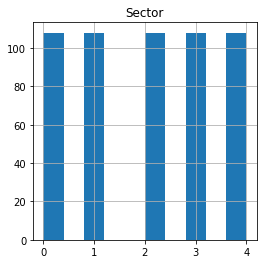

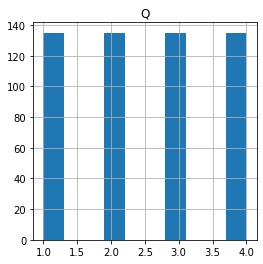

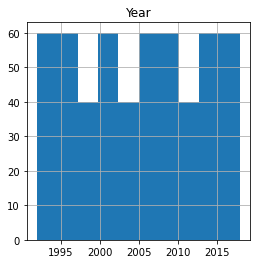

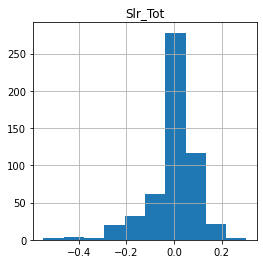

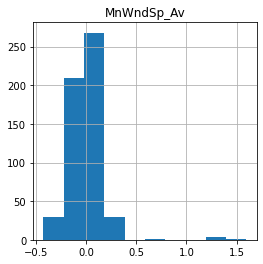

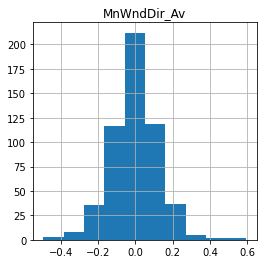

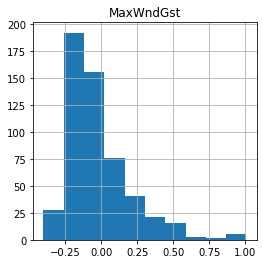

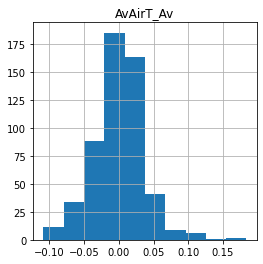

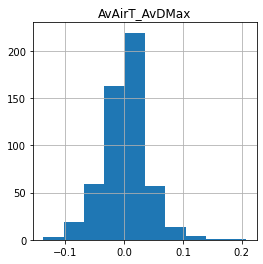

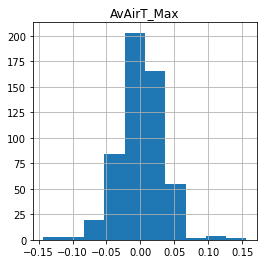

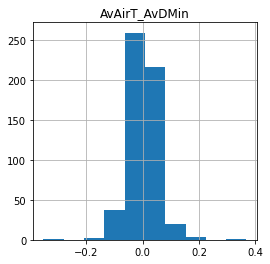

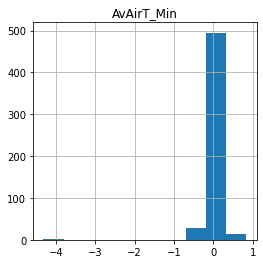

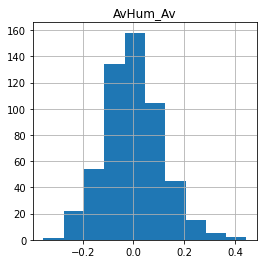

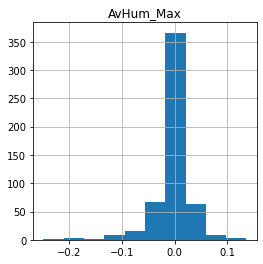

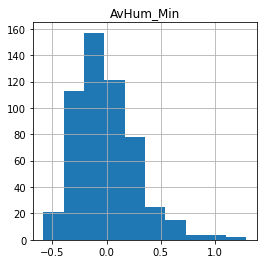

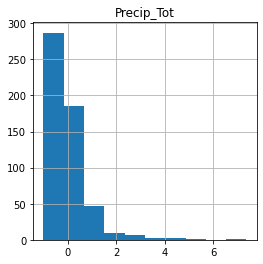

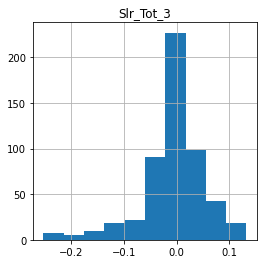

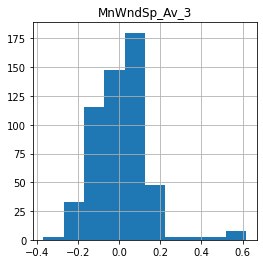

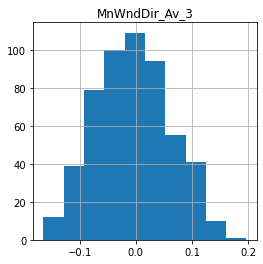

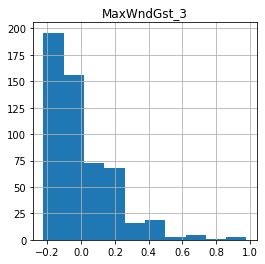

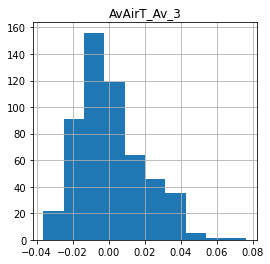

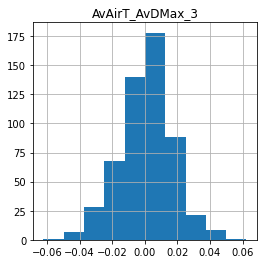

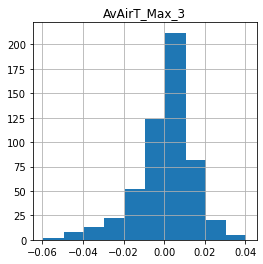

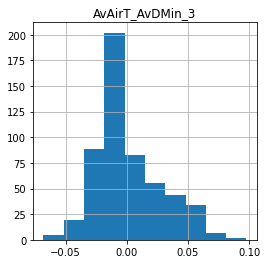

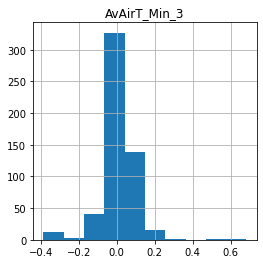

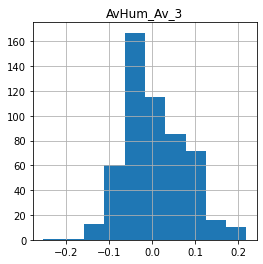

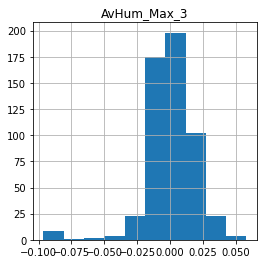

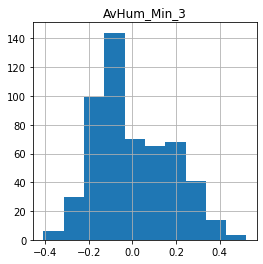

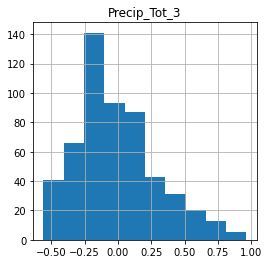

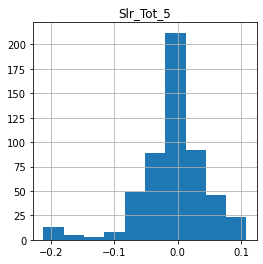

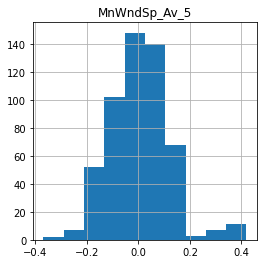

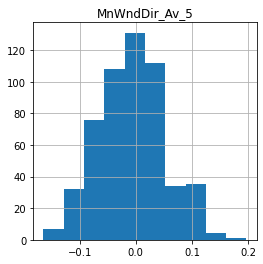

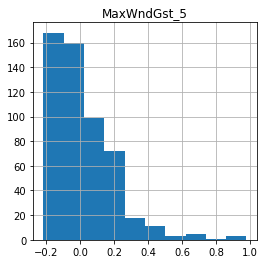

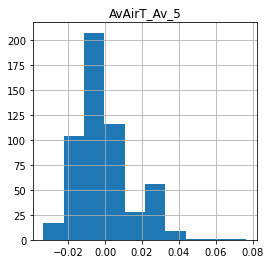

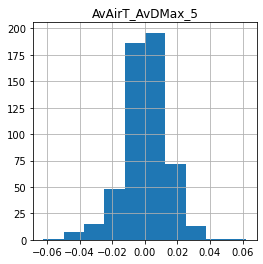

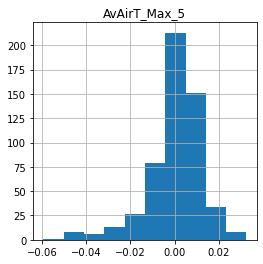

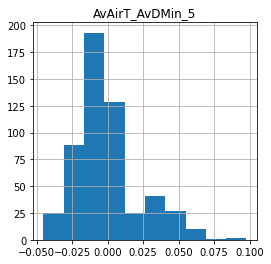

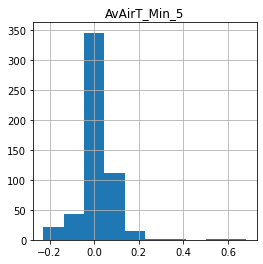

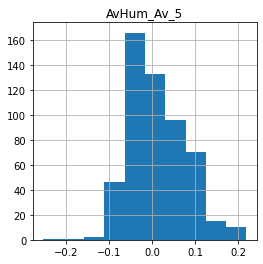

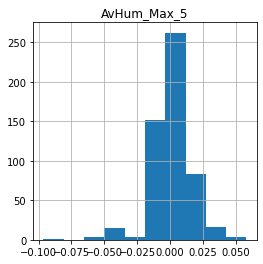

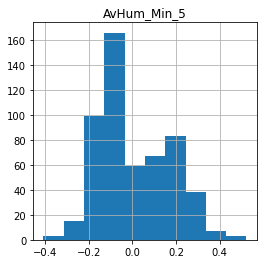

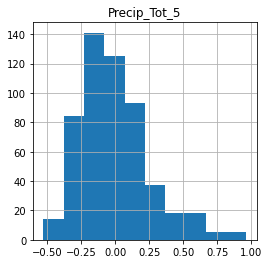

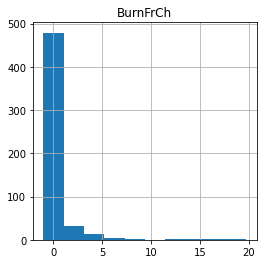

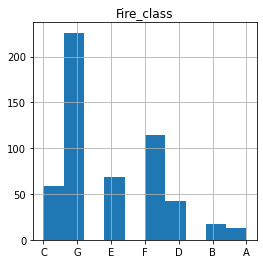

In [8]:
##Checking each feature for outliers and skew
feats = fires.columns
for f in feats:
    plt.figure(figsize=(4,4))
    fires[f].hist()
    plt.title(f)
    plt.show()

### Feature Selection

In [9]:
# Separating target from features
X = fires.drop(['Fire_class'], axis=1)
Y = fires['Fire_class']


In [10]:
## Train-test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=614,shuffle=True,stratify=Y) 

In [11]:
# Check for data imbalance
Y_train.value_counts()

G    169
F     86
E     52
C     44
D     31
B     13
A     10
Name: Fire_class, dtype: int64

Data is not balanced for different categories which can bias the model towards F and G class. Therefore, the data is balanced using SMOTE which performs oversampling using synthetic data to equalize datapoints for each category.

In [12]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state=614)
X_train, Y_train = oversample.fit_resample(X_train,Y_train)

In [13]:
Y_train.value_counts()

G    169
F    169
E    169
D    169
C    169
B    169
A    169
Name: Fire_class, dtype: int64

In [14]:
# Check for features with low variance
# first normalize each feature to make variances comparable between features
X_train_norm = X_train/X_train.mean()
features_train = X_train_norm.columns
for feat in features_train:
    threshold = 0.001
    variance = X_train_norm[feat].var()
    if (variance<threshold):
        print(feat, "should be dropped")

Year should be dropped


This makes sense because normalized year column is not sensible and there won't be too much variation as data is over 16 years. Anyway the year column will be irrelevant in the analysis because the year dependent parameters have already been categorized as past 1 year, 3 year and 5 year averages.

In [15]:
X_train = X_train.drop(['Year'],axis=1)
X_train.shape

(1183, 42)

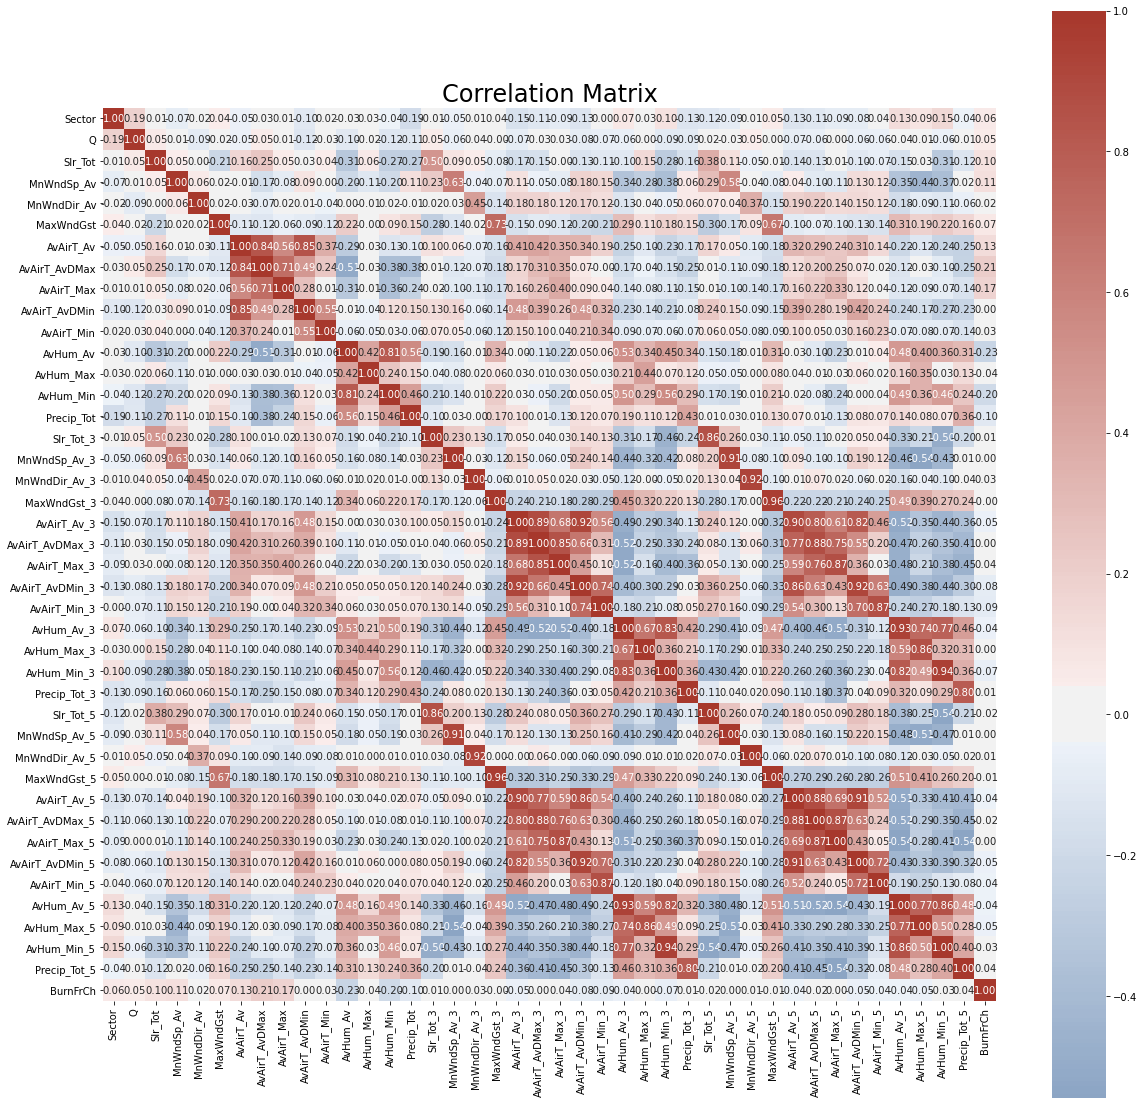

In [16]:
# Check for correlated features
# Using pearson correlation coefficient and generating a heatmap
correlation = X_train.corr()
plt.figure(figsize=(20,20))
# Create custom diverging palette to map the map easy to read
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)
cmap = sns.heatmap(correlation, center=0, annot=True, 
                fmt='.2f', square=True, cmap=cmap)
plt.title('Correlation Matrix', fontsize=24)
plt.savefig('correlation_matrix_mc.png')

Many features seem correlated so removing them based on threshold value.

In [17]:
def correlation(dataframe,threshold):
    col_corr = set()
    corr_matrix = dataframe.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j])>threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [18]:
# Identifying features with high correlation, pearson coefficient>0.8
corr_cols = list(correlation(X_train,0.8))
print(corr_cols)

['AvHum_Min_3', 'AvAirT_Min_5', 'AvAirT_AvDMin_5', 'AvAirT_AvDMin', 'AvAirT_AvDMax_5', 'AvHum_Min_5', 'AvHum_Min', 'MnWndDir_Av_5', 'Slr_Tot_5', 'AvAirT_AvDMax_3', 'MnWndSp_Av_5', 'AvHum_Max_5', 'AvAirT_AvDMin_3', 'AvHum_Av_5', 'MaxWndGst_5', 'Precip_Tot_5', 'AvAirT_Max_5', 'AvAirT_AvDMax', 'AvAirT_Av_5', 'AvAirT_Max_3']


In [19]:
# Dropping highly correlated columns
X_train = X_train.drop(corr_cols,axis=1)

In [20]:
X_train.shape

(1183, 22)

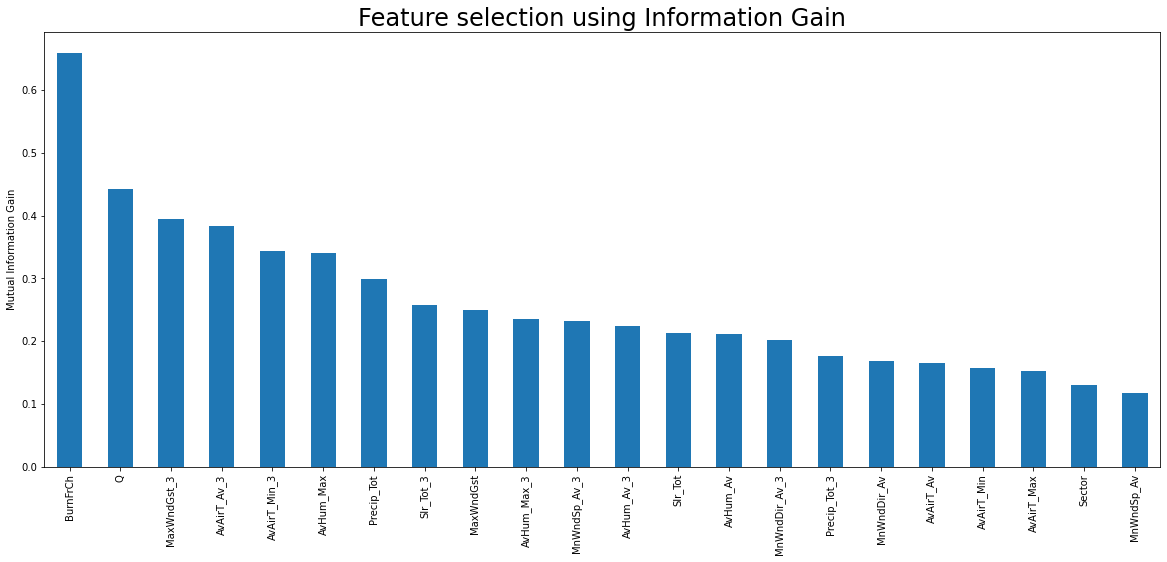

In [21]:
## Selecting features using Information Gain
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train,Y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8))
plt.ylabel('Mutual Information Gain')
plt.title('Feature selection using Information Gain',fontsize=24)
plt.savefig('info_gain_mc.png')

In [22]:
mutual_info.sort_values(ascending=False)

BurnFrCh         0.658924
Q                0.441537
MaxWndGst_3      0.394222
AvAirT_Av_3      0.383348
AvAirT_Min_3     0.343181
AvHum_Max        0.340178
Precip_Tot       0.298716
Slr_Tot_3        0.258012
MaxWndGst        0.249153
AvHum_Max_3      0.234927
MnWndSp_Av_3     0.232305
AvHum_Av_3       0.223552
Slr_Tot          0.213342
AvHum_Av         0.212148
MnWndDir_Av_3    0.202660
Precip_Tot_3     0.176339
MnWndDir_Av      0.168074
AvAirT_Av        0.164591
AvAirT_Min       0.157665
AvAirT_Max       0.151984
Sector           0.130206
MnWndSp_Av       0.117463
dtype: float64

There are not features with very low information gain score therefore, keeping all the features.

In [23]:
# Removing discarded columns from test data
good_cols = X_train.columns
X_test = X_test[good_cols]
X_test.shape

(135, 22)

### Model Building

In [24]:
Y_test.shape

(135,)

In [25]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

To accurately assess level of risk and effectively predict the preparation required, it is crucial to classify the possible wildfire event into the correct category as the categories are based on extent of burnt area and signify the scale of possible damage. Therefore, we aim to reduce misclassification by optimizing the macro F1-score. We do not use weighted macro F1-svore since we had equally balanced the data earlier for all categories. We will perform hyper-parameter tuning for various models to maximize the macro F1-score.

#### Decision Tree

In [26]:
# Importing packages
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

Macro f1 score  is [0.17746705 0.28182931 0.48857787 0.5821668  0.64805979 0.68700111
 0.72116839 0.7620617  0.77425454 0.78425823 0.7886965  0.78599217
 0.79075918 0.78744137 0.78744137 0.78744137 0.78744137 0.78744137
 0.78744137 0.78744137]


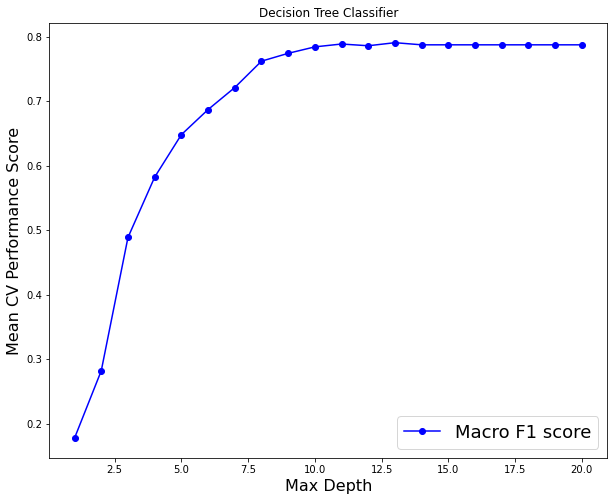

In [31]:
## Performing 5-fold Cross-validation while iterating max_depth
kfold = StratifiedKFold(n_splits=5,shuffle = True,random_state=440)
n=20
f1 = np.zeros((5,n))
for j in range(1,n+1):
    tree_clf = DecisionTreeClassifier(max_depth=j,random_state=614)
    i=0
    for train_index,test_index in kfold.split(X_train,Y_train):
        X_train_train,X_train_test = X_train.iloc[train_index],X_train.iloc[test_index]
        Y_train_train,Y_train_test = Y_train.iloc[train_index],Y_train.iloc[test_index]
    ## print(" for iteration",i,"X_train_train is",X_train_train,"and X_train_test is",X_train_test)
    
        tree_clf_clone = clone(tree_clf)
        tree_clf_clone.fit(X_train_train,Y_train_train)
        Y_predict = tree_clf_clone.predict(X_train_test)
        f1[i,j-1] = f1_score(Y_train_test,Y_predict, average='macro')
        i = i + 1

print("Macro f1 score  is",np.mean(f1,axis=0))

plt.figure(figsize=(10,8))

plt.plot(range(1,n+1), np.mean(f1,axis=0),'b-o', label="Macro F1 score")


plt.ylabel("Mean CV Performance Score",fontsize=16)
plt.xlabel("Max Depth",fontsize=16)

plt.legend(fontsize=18)
plt.title("Decision Tree Classifier")
#plt.show()
plt.savefig("Decision_tree_metrics_mc.png")

#### Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

CV Macro F1 score is [0.85085509 0.8742292  0.88678492 0.90086552 0.9018584  0.89947422
 0.90204418 0.89933012 0.90085073 0.89518397]


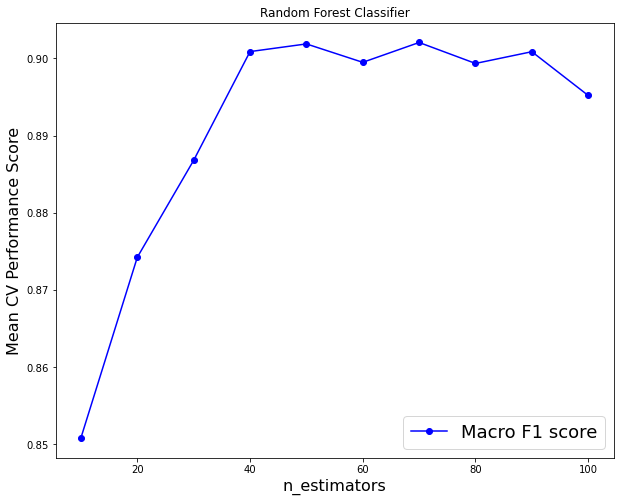

In [33]:
## Performing 5-fold Cross-validation while iterating n_estimators
kfold = StratifiedKFold(n_splits=5,shuffle = True,random_state=440)
trees =np.arange(10,110,10)
f1_rf = np.zeros((5,len(trees)))

for j in range(len(trees)):
    rf_clf = RandomForestClassifier(n_estimators=trees[j-1],random_state=614)
    i=0
    for train_index,test_index in kfold.split(X_train,Y_train):
        X_train_train,X_train_test = X_train.iloc[train_index],X_train.iloc[test_index]
        Y_train_train,Y_train_test = Y_train.iloc[train_index],Y_train.iloc[test_index]
    ## print(" for iteration",i,"X_train_train is",X_train_train,"and X_train_test is",X_train_test)
    
        rf_clf_clone = clone(rf_clf)
        rf_clf_clone.fit(X_train_train,Y_train_train)
        Y_predict = rf_clf_clone.predict(X_train_test)
        f1_rf[i,j-1] = f1_score(Y_train_test,Y_predict,average='macro')
       
        i = i + 1

print("CV Macro F1 score is",np.mean(f1_rf,axis=0))


plt.figure(figsize=(10,8))

plt.plot(np.arange(10,110,10), np.mean(f1_rf,axis=0),'b-o', label="Macro F1 score")


plt.ylabel("Mean CV Performance Score",fontsize=16)
plt.xlabel("n_estimators",fontsize=16)

plt.legend(fontsize=18)
plt.title("Random Forest Classifier")
plt.show()
#plt.savefig('Random_forest_metrics.png')

CV Macro Recall score is [0.90300484 0.89618029 0.90550038 0.9004329  0.90550038 0.9012987
 0.90211357 0.90124777 0.90547492 0.90547492]
CV Macro Precision score is [0.90365101 0.89723782 0.9065816  0.90120838 0.90585924 0.90180718
 0.90281019 0.90187187 0.9059841  0.90569341]
CV Macro F1 score is [0.9018584  0.89518397 0.90453813 0.89945435 0.90444037 0.90028454
 0.90134375 0.90047816 0.90463889 0.9044817 ]


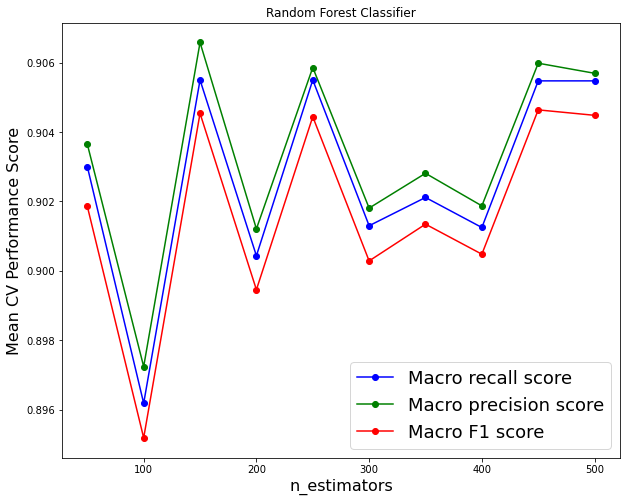

In [32]:
## Performing 5-fold Cross-validation while iterating n_estimators
kfold = StratifiedKFold(n_splits=5,shuffle = True,random_state=440)
trees =np.arange(50,550,50)
recs_rf = np.zeros((5,len(trees)))
precs_rf = np.zeros((5,len(trees)))
f1_rf = np.zeros((5,len(trees)))
for j in range(len(trees)):
    rf_clf = RandomForestClassifier(n_estimators=trees[j-1],random_state=614)
    i=0
    for train_index,test_index in kfold.split(X_train,Y_train):
        X_train_train,X_train_test = X_train.iloc[train_index],X_train.iloc[test_index]
        Y_train_train,Y_train_test = Y_train.iloc[train_index],Y_train.iloc[test_index]
    
        rf_clf_clone = clone(rf_clf)
        rf_clf_clone.fit(X_train_train,Y_train_train)
        Y_predict = rf_clf_clone.predict(X_train_test)
        recs_rf[i,j-1] = recall_score(Y_train_test,Y_predict,average='macro')
        precs_rf[i,j-1] = precision_score(Y_train_test,Y_predict,average='macro')
        f1_rf[i,j-1] = f1_score(Y_train_test,Y_predict,average='macro')
        i = i + 1

print("CV Macro Recall score is",np.mean(recs_rf,axis=0))
print("CV Macro Precision score is",np.mean(precs_rf,axis=0))
print("CV Macro F1 score is",np.mean(f1_rf,axis=0))

plt.figure(figsize=(10,8))

plt.plot(np.arange(50,550,50), np.mean(recs_rf,axis=0),'b-o', label="Macro recall score")
plt.plot(np.arange(50,550,50), np.mean(precs_rf,axis=0),'g-o', label="Macro precision score")
plt.plot(np.arange(50,550,50), np.mean(f1_rf,axis=0),'r-o', label="Macro F1 score")

plt.ylabel("Mean CV Performance Score",fontsize=16)
plt.xlabel("n_estimators",fontsize=16)

plt.legend(fontsize=18)
plt.title("Random Forest Classifier")
#plt.show()
plt.savefig('Random_forest_metrics_mc.png')

In [39]:
rf_clf_test = RandomForestClassifier(n_estimators=150)
rf_clf_test.fit(X_test,Y_test)
Y_predict_rf = rf_clf_test.predict(X_test)
f1_rf = f1_score(Y_test,Y_predict_rf, average='macro')

print("CV Macro F1 score is",f1_rf)

CV Macro F1 score is 1.0
